In [1]:
# Importação das bibliotecas.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Exploração dos dados
Dicionário das variáveis:

- __person_age__: Age
- __person_income__: Annual Income
- __person_home_ownership__: Home ownership
- __person_emp_length__: Employment length (in years)
- __loan_intent__: Loan intent
- __loan_grade__: Loan grade
- __loan_amnt__: Loan amount
- __loan_int_rate__: Interest rate
- __loan_status__: Loan status (0 is non default 1 is default)
- __loan_percent_income__: Percent income
- __cb_person_default_on_file__: Historical default
- __cb_preson_cred_hist_length__: Credit history length

In [2]:
# importação dos dados
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
# Visualizar as primeiras linhas
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Verificar algumas informações das variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Estatísticas descritivas das variáveis numéricas
df.describe().round(3)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000,32581.000,31686.000,32581.000,29465.000,32581.000,32581.000,32581.000
mean,27.735,66074.848,4.790,9589.371,11.012,0.218,0.170,5.804
std,6.348,61983.119,4.143,6322.087,3.240,0.413,0.107,4.055
min,20.000,4000.000,0.000,500.000,5.420,0.000,0.000,2.000
25%,23.000,38500.000,2.000,5000.000,7.900,0.000,0.090,3.000
50%,26.000,55000.000,4.000,8000.000,10.990,0.000,0.150,4.000
75%,30.000,79200.000,7.000,12200.000,13.470,0.000,0.230,8.000
max,144.000,6000000.000,123.000,35000.000,23.220,1.000,0.830,30.000


In [6]:
# Retornar a pessoa com maior salario
df[df['person_income'] >= 6000000.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [7]:
# Retornar a pessoa com o menor salário
df[df['person_income'] <= 4000.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
31930,41,4000,RENT,0.0,MEDICAL,C,2000,13.22,1,0.5,Y,15


In [8]:
# Retornar o cliente com a maior DIVIDA
df[df['loan_amnt'] >= 35000.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32158,37,85000,RENT,5.0,DEBTCONSOLIDATION,A,35000,8.90,1,0.41,N,17
32299,65,76000,RENT,3.0,EDUCATION,B,35000,10.99,1,0.46,N,27
32301,53,85000,RENT,19.0,PERSONAL,D,35000,15.65,1,0.41,N,19
32302,58,108350,RENT,5.0,PERSONAL,D,35000,14.91,1,0.32,N,19


In [9]:
# Retornar o cliente com a menor DIVIDA
df[df['loan_amnt'] <= 500.000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
871,26,19500,RENT,0.0,MEDICAL,C,500,11.41,0,0.03,N,2
1355,22,26000,MORTGAGE,3.0,PERSONAL,B,500,10.46,0,0.02,N,4
8607,26,59000,MORTGAGE,7.0,HOMEIMPROVEMENT,B,500,9.76,0,0.01,N,2
15951,26,7904,MORTGAGE,0.0,HOMEIMPROVEMENT,B,500,10.71,0,0.06,N,3
18502,33,18000,RENT,0.0,DEBTCONSOLIDATION,A,500,NaN,0,0.03,N,6


### Visualização dos dados

In [10]:
# vamos fazer a contagem de quantos dados existem em cada variável
np.unique(df['loan_status'], return_counts=True)

(array([0, 1]), array([25473,  7108]))

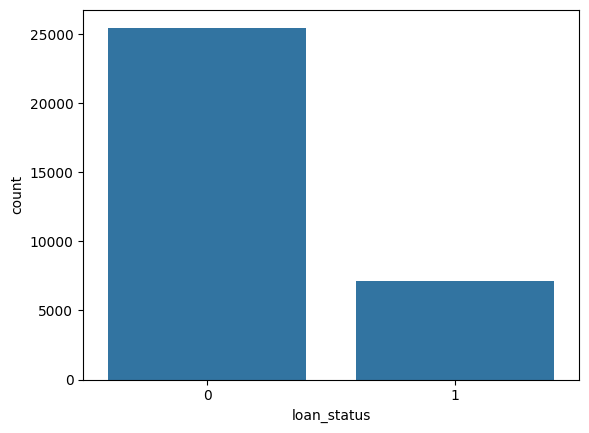

In [11]:
# Grafico de barras para a variavel "loan_status"
sns.countplot(x=df['loan_status']);

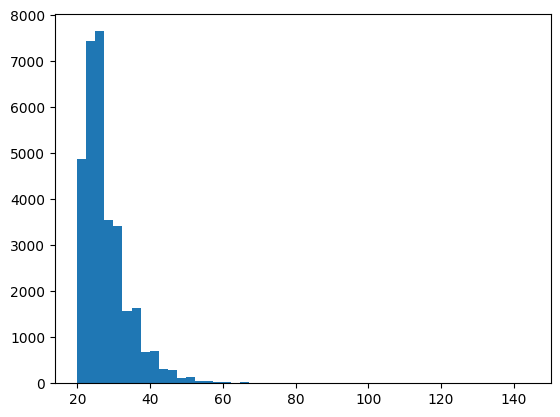

In [12]:
# Histograma para a variavel "person_age"
plt.hist(x=df['person_age'], bins=50);

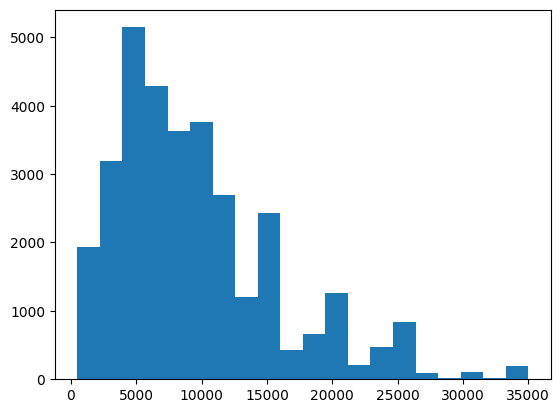

In [13]:
# Histograma para a variavel "loan_amnt"
plt.hist(x=df['loan_amnt'], bins=20);

In [14]:
# Gráfico dinâmico
grafico = px.scatter_matrix(df, dimensions=['person_age'])
grafico.show()